In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read image 
img = cv2.imread("Thar.jpg", 0)

In [5]:
# 1. Contrast Stretching
min_val = np.min(img)
max_val = np.max(img)

stretched = ((img - min_val) / (max_val - min_val)) * 255
stretched = stretched.astype(np.uint8)

In [7]:
# 2. Histogram Equalization
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

(-0.5, 495.5, 309.5, -0.5)

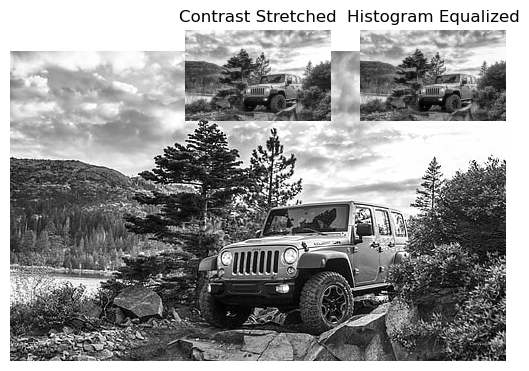

In [17]:
# Original Image
plt.subplot(2,2,2)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(stretched, cmap='gray')
plt.title("Contrast Stretched")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")


Text(0.5, 1.0, 'Equalized Histogram')

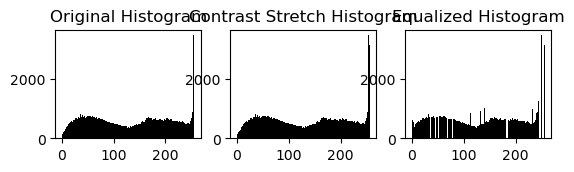

In [11]:
# Histograms
plt.subplot(3, 3, 4)
plt.hist(img.ravel(), 256, [0, 256], color='black')
plt.title("Original Histogram")

plt.subplot(3, 3, 5)
plt.hist(stretched.ravel(), 256, [0, 256], color='black')
plt.title("Contrast Stretch Histogram")

plt.subplot(3, 3, 6)
plt.hist(equalized.ravel(), 256, [0, 256], color='black')
plt.title("Equalized Histogram")


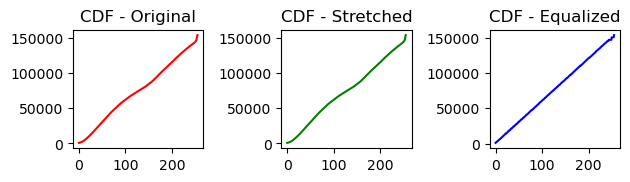

In [13]:
# CDF comparison
cdf_original = cv2.calcHist([img],[0],None,[256],[0,256]).cumsum()
cdf_stretched = cv2.calcHist([stretched],[0],None,[256],[0,256]).cumsum()
cdf_equalized = cv2.calcHist([equalized],[0],None,[256],[0,256]).cumsum()

plt.subplot(3, 3, 7)
plt.plot(cdf_original, color='red')
plt.title("CDF - Original")

plt.subplot(3, 3, 8)
plt.plot(cdf_stretched, color='green')
plt.title("CDF - Stretched")

plt.subplot(3, 3, 9)
plt.plot(cdf_equalized, color='blue')
plt.title("CDF - Equalized")

plt.tight_layout()
plt.show()